In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [50]:
# CSV file path
file_path = r"/content/Cleaned_Glassdoor_Salary.csv"

# Load the CSV file
dataset = pd.read_csv(file_path)

In [51]:
# Check the dataset shape
print("Dataset Shape (Rows, Columns):", dataset.shape)

# Display data types of each column
print("\nDataset Information:")
print(dataset.info())

# View summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(dataset.describe())

# Check unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
categorical_columns = dataset.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"{column}: {dataset[column].unique()[:10]}")  # Display the first 10 unique values

# Check for missing values
print("\nMissing Values in Each Column:")
print(dataset.isnull().sum())

Dataset Shape (Rows, Columns): (467, 20)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          467 non-null    object 
 1   Rating             467 non-null    float64
 2   Company Name       467 non-null    object 
 3   Headquarters       467 non-null    object 
 4   Size               467 non-null    object 
 5   Founded            467 non-null    int64  
 6   Type of ownership  467 non-null    object 
 7   Industry           467 non-null    object 
 8   Revenue            467 non-null    object 
 9   min_salary         467 non-null    int64  
 10  max_salary         467 non-null    int64  
 11  avg_salary         467 non-null    float64
 12  age                467 non-null    int64  
 13  python_yn          467 non-null    int64  
 14  R_yn               467 non-null    int64  
 15  spark      

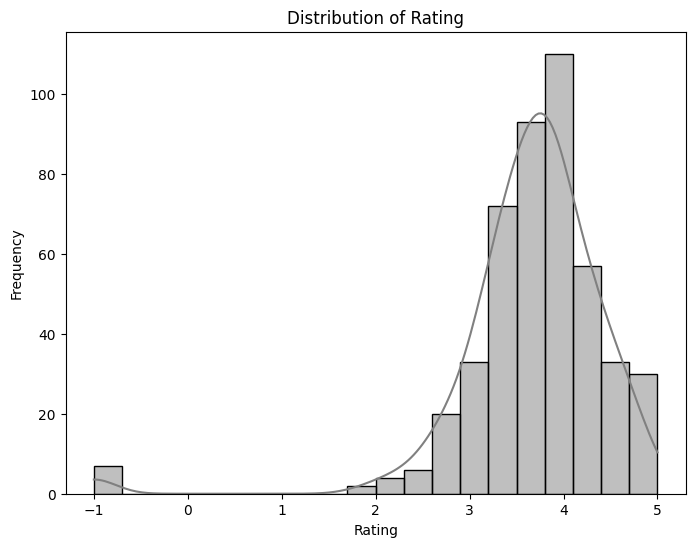

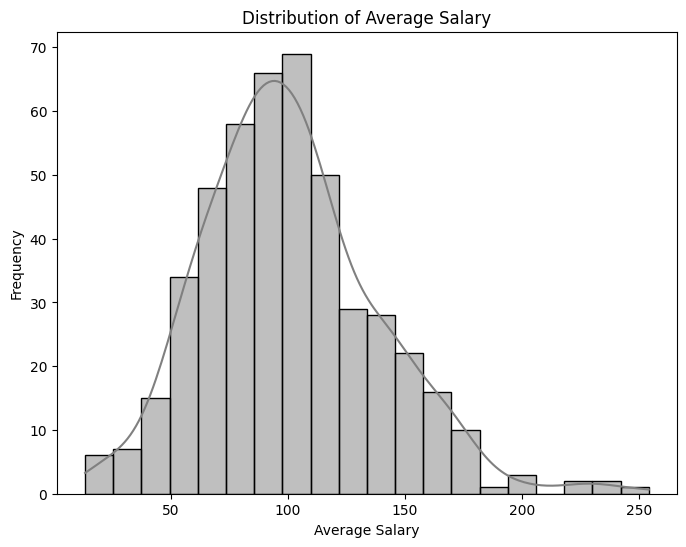

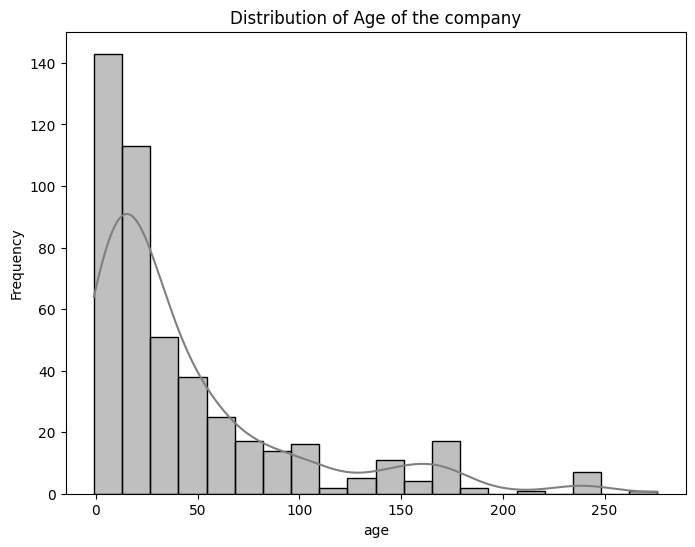

In [52]:
# Univariate Analysis of Rating
plt.figure(figsize=(8, 6))
sns.histplot(dataset["Rating"], kde=True, bins=20, color='grey')
plt.title(f'Distribution of {"Rating"}')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Univariate Analysis of Average Salary
plt.figure(figsize=(8, 6))
sns.histplot(dataset["avg_salary"], kde=True, bins=20, color='grey')
plt.title(f'Distribution of {"Average Salary"}')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.show()

# Univariate Analysis of Age of the company
plt.figure(figsize=(8, 6))
sns.histplot(dataset['age'], kde=True, bins=20, color='grey')
plt.title(f'Distribution of Age of the company')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

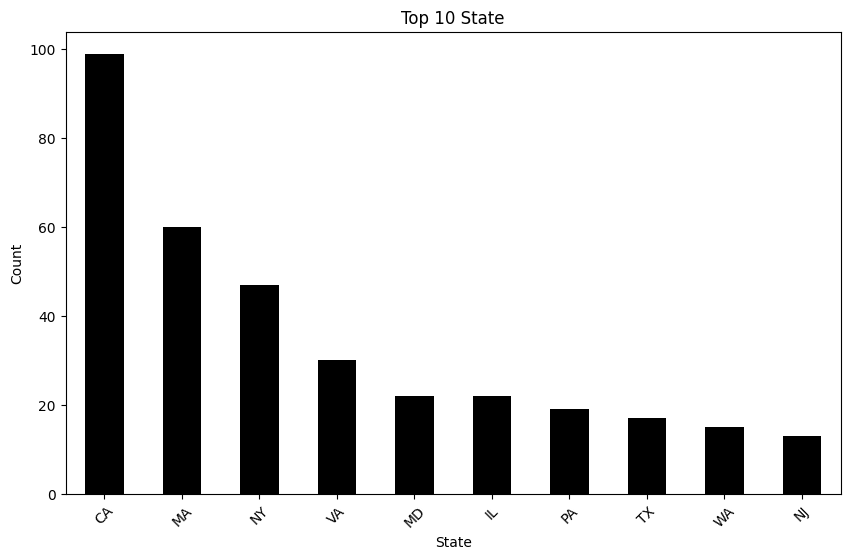

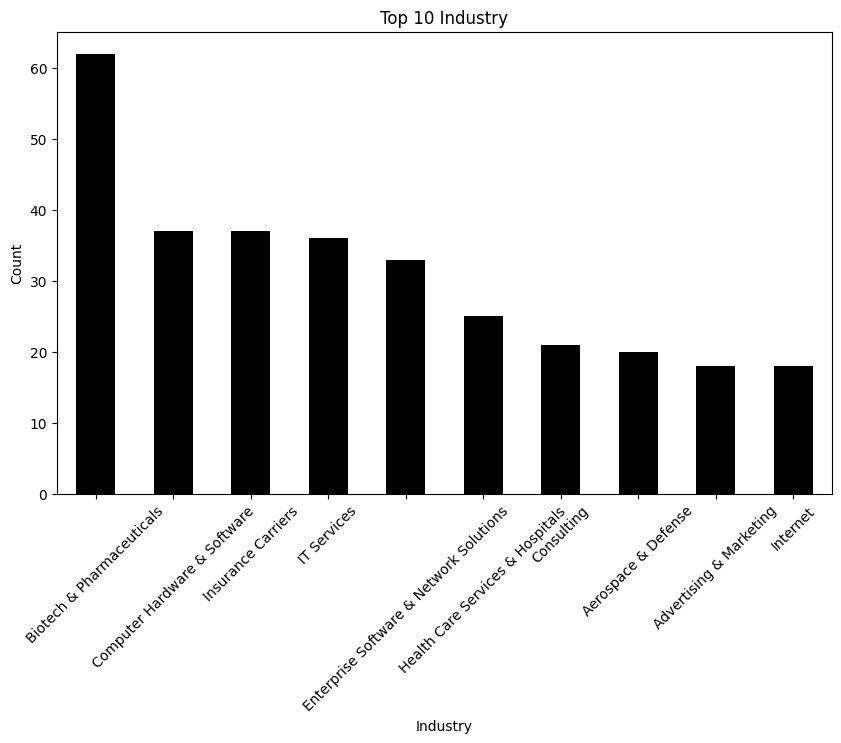

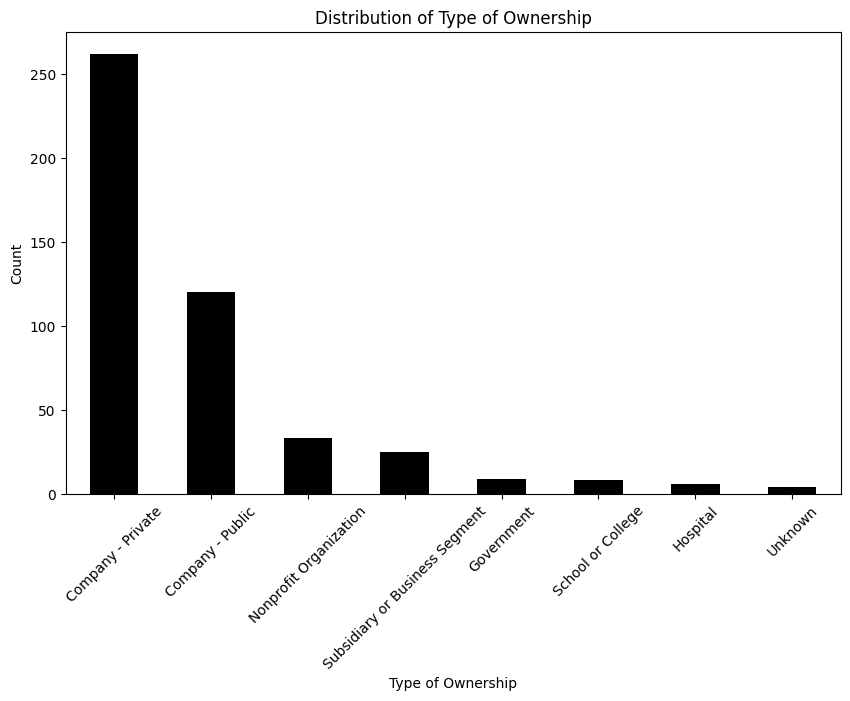

In [53]:
# Univariate analysis of categorical columns
def univariate_categorical(data, column, top_n=10):
    plt.figure(figsize=(10, 6))
    top_categories = data[column].value_counts().head(top_n)
    top_categories.plot(kind='bar', color='black')
    plt.title(f'Top {top_n} {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Analyze the top 10 states with the most companies
univariate_categorical(dataset, 'State', top_n=10)

# Analyze the top 10 industries with the most companies
univariate_categorical(dataset, 'Industry', top_n=10)

# Analyze the distribution of the "Type of Ownership"
plt.figure(figsize=(10, 6))
dataset['Type of ownership'].value_counts().plot(kind='bar', color='black')
plt.title('Distribution of Type of Ownership')
plt.xlabel('Type of Ownership')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': 'Average Salary by Industry'}, xlabel='Industry'>

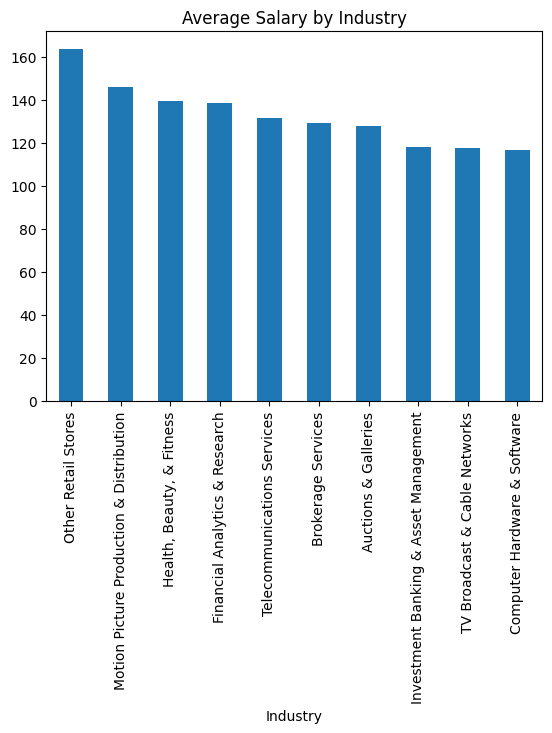

In [54]:
# Average salary by industry
industry_salary = dataset.groupby('Industry')['avg_salary'].mean().sort_values(ascending=False)
industry_salary.head(10).plot(kind='bar', title='Average Salary by Industry')

<Axes: title={'center': 'Average Salary by State'}, xlabel='State'>

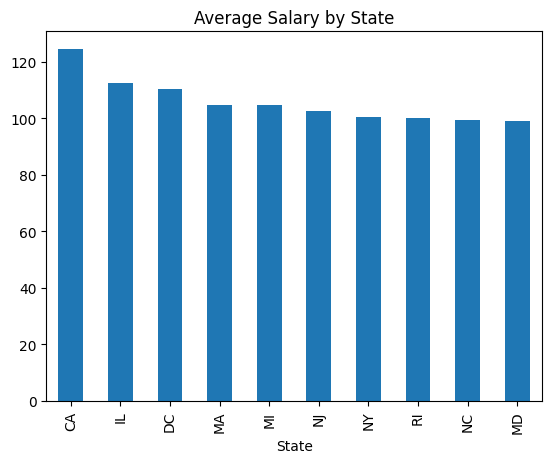

In [55]:
# Average salary by state
state_salary = dataset.groupby('State')['avg_salary'].mean().sort_values(ascending=False)
state_salary.head(10).plot(kind='bar', title='Average Salary by State')

In [56]:
# Function to perform t-test for a given skill
def t_test_skill(dataset, skill_column):
    # Split the dataset into two groups based on the skill requirement
    skill_salary = dataset[dataset[skill_column] == 1]['avg_salary']
    non_skill_salary = dataset[dataset[skill_column] == 0]['avg_salary']

    # Perform the t-test
    t_stat, p_value = ttest_ind(skill_salary, non_skill_salary, equal_var=False)

    # Print the results
    print(f"\nT-test results for {skill_column}:")
    print("T-statistic:", t_stat)
    print("P-value:", p_value)
    if p_value < 0.05:
        print(f"Reject the null hypothesis: {skill_column} requirement impacts average salary.")
    else:
        print(f"Fail to reject the null hypothesis: No significant impact of {skill_column} requirement on average salary.")

# Perform t-test for python_yn, R_yn, and excel
skills = ['python_yn', 'R_yn', 'excel']
for skill in skills:
    t_test_skill(dataset, skill)


T-test results for python_yn:
T-statistic: 6.367634133410585
P-value: 4.839359741004603e-10
Reject the null hypothesis: python_yn requirement impacts average salary.

T-test results for R_yn:
T-statistic: -1.3914001397355469
P-value: 0.39461591413690994
Fail to reject the null hypothesis: No significant impact of R_yn requirement on average salary.

T-test results for excel:
T-statistic: -1.4359613391822796
P-value: 0.15169219505567744
Fail to reject the null hypothesis: No significant impact of excel requirement on average salary.
